In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

In [17]:
df = pd.read_csv('./data/Overstock_data.csv', low_memory=False)

In [3]:
df.shape

(11495, 142)

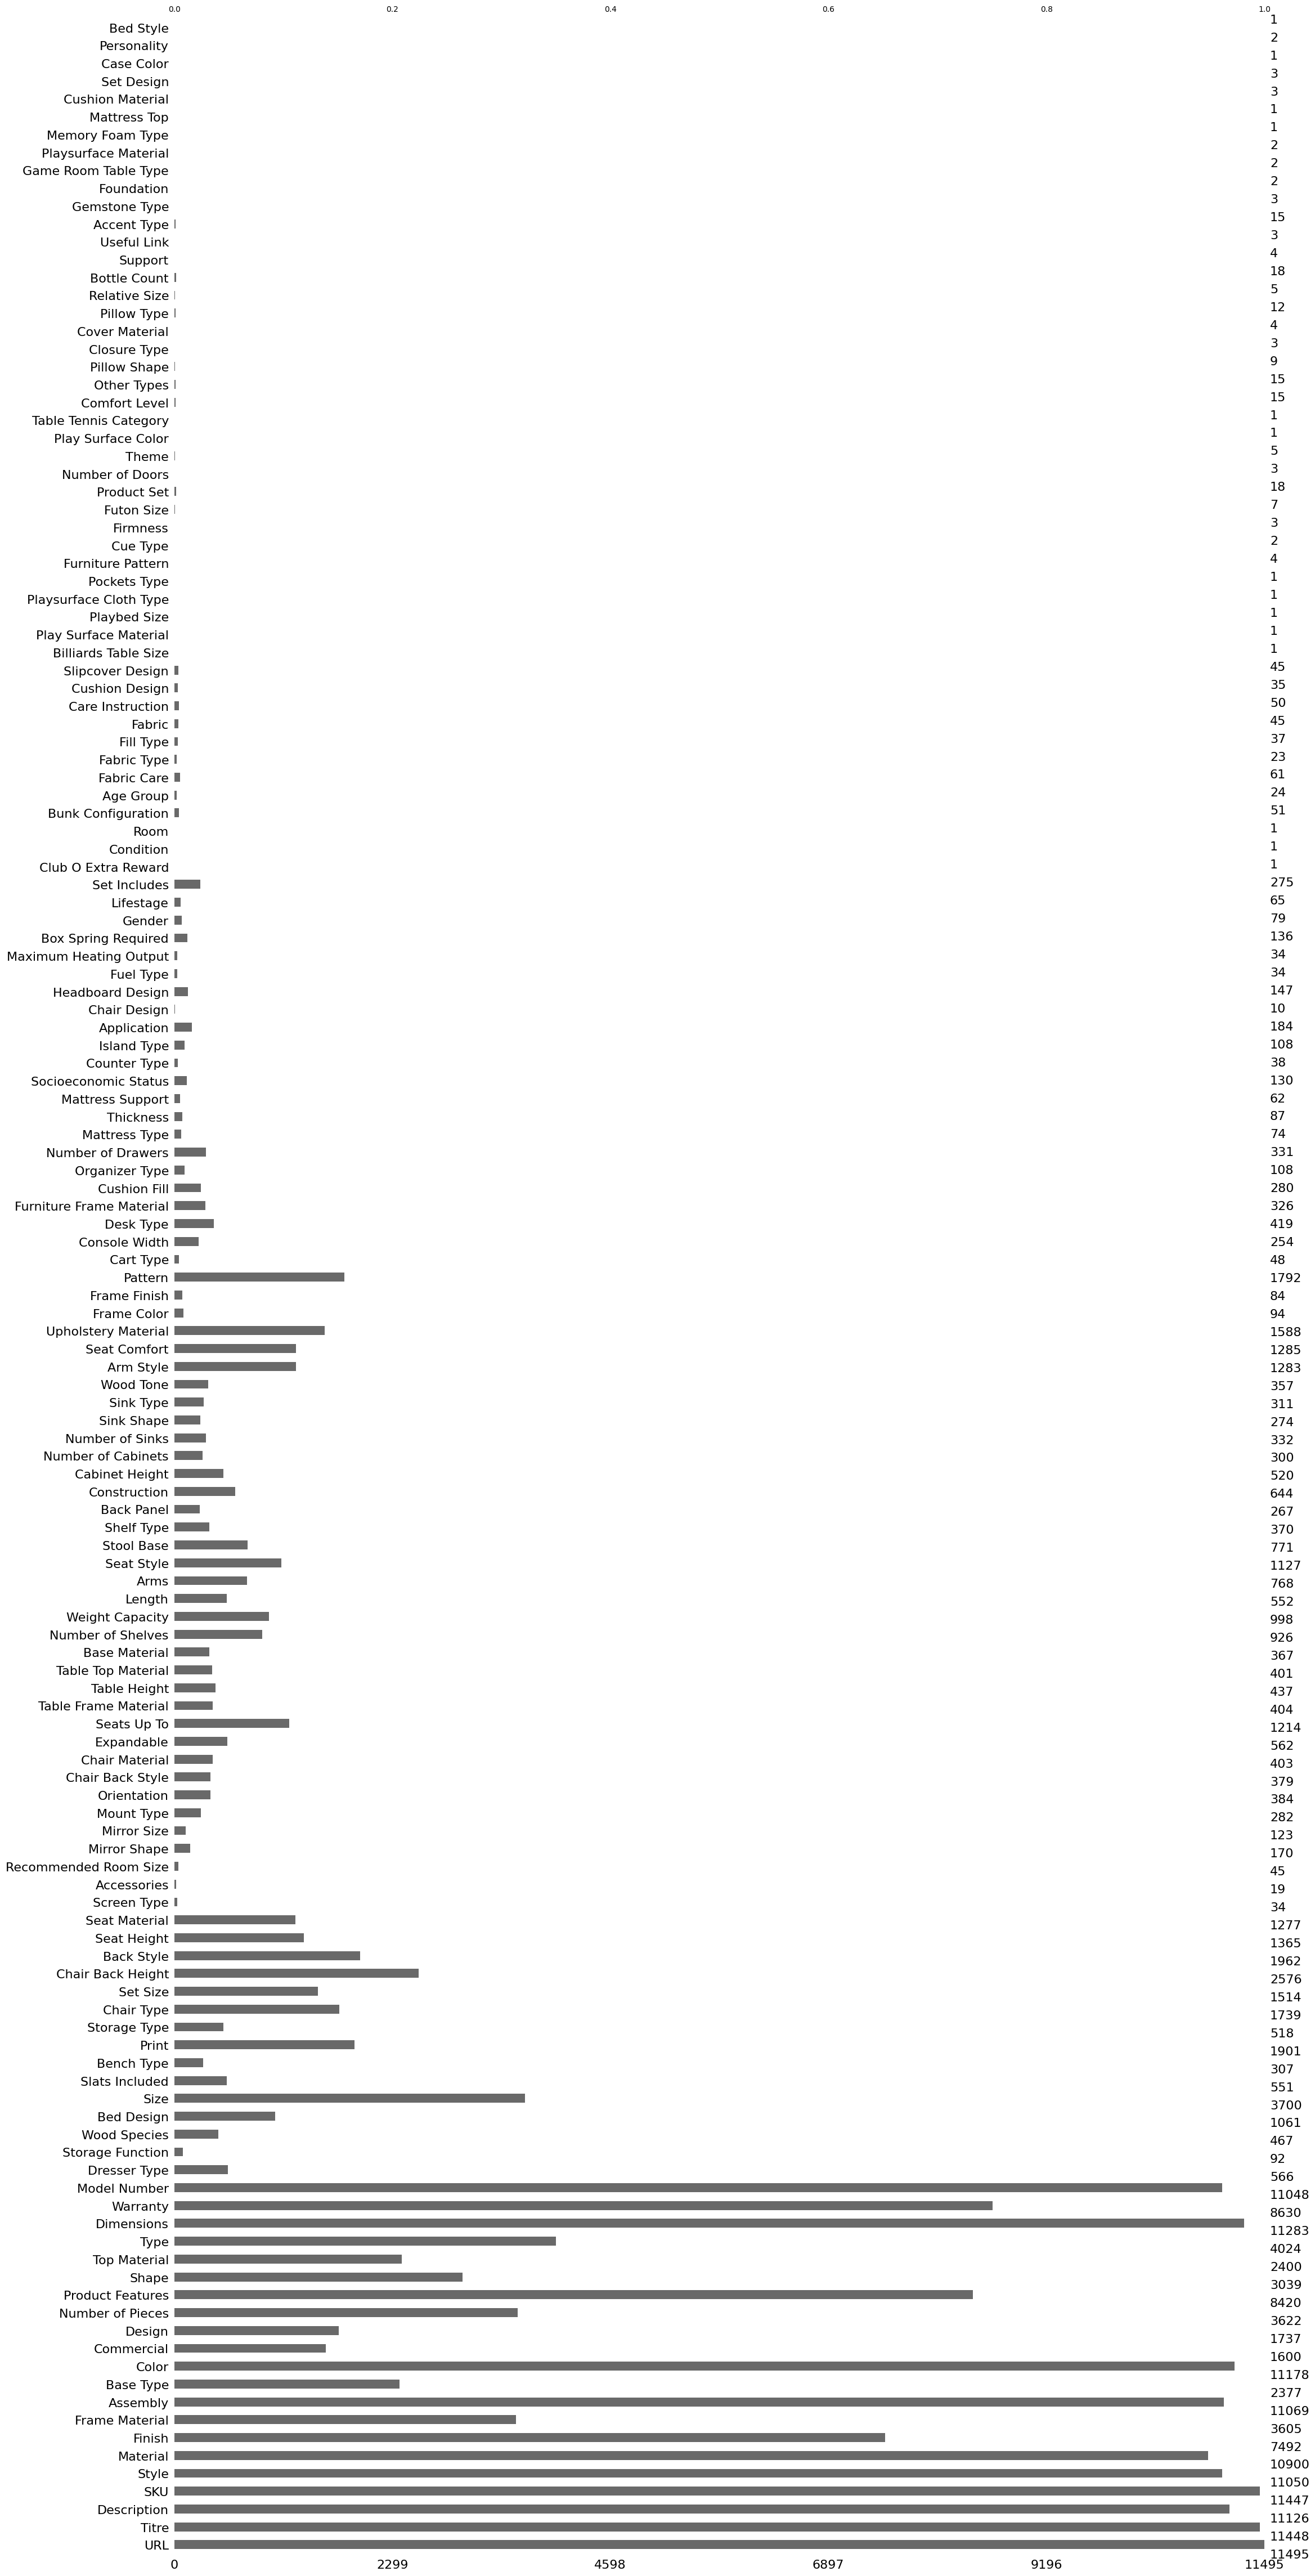

In [18]:
msno.bar(df);

In [5]:
df_clean = df.loc[:, df.isnull().mean() <= 0.5]
print(f"shape = {df_clean.shape}")
df_clean.columns.to_list()

shape = (11495, 13)


['URL',
 'Titre',
 'Description',
 'SKU',
 'Style',
 'Material',
 'Finish',
 'Assembly',
 'Color',
 'Product Features',
 'Dimensions',
 'Warranty',
 'Model Number']

In [6]:
df_clean.head(1)

,URL,Titre,Description,SKU,Style,Material,Finish,Assembly,Color,Product Features,Dimensions,Warranty,Model Number
0,https://www.overstock.com/products/39-inch-ind...,39-Inch Industrial Console Entryway Table Smal...,"Expertly crafted, this console table featuring...",42838838-000-000,"Industrial,\n M...","MDF,\n Metal",Wood Finish,Assembly Required,Brown,"Includes Hardware,\n ...",39.37 In. L X 11.81 In. W X 31.5 In. H,180 day Limited Distributor,W-YZ-JW0626


In [7]:
cols = ['Model Number', 'SKU', 'URL', 'Titre']
df_clean = df_clean.drop(columns=cols)
df_clean.shape

(11495, 9)

In [8]:
df_clean.head()

,Description,Style,Material,Finish,Assembly,Color,Product Features,Dimensions,Warranty
0,"Expertly crafted, this console table featuring...","Industrial,\n M...","MDF,\n Metal",Wood Finish,Assembly Required,Brown,"Includes Hardware,\n ...",39.37 In. L X 11.81 In. W X 31.5 In. H,180 day Limited Distributor
1,Add even more organization to your ample Famil...,Modern & Contemporary,"Pine,\n Wood","Satin,\n Stained",Assembled,"Black,\n Brown,...","Includes Hardware,\n ...",18.0 In. W X 0.75 In. H X 28.0 In. D,1 year Limited Distributor
2,The Boyd Sleep Lugano Platform Bed Frame is a ...,Modern & Contemporary,Wood,Natural,Assembly Required,"Black,\n White",Includes Hardware,78.15 In. L X 56.5 In. W X 11.81 In. H,1 year Limited Manufacturer
3,Introducing the Nova Bench. This bench comes f...,Transitional,Mahogany,Honey Finish,Assembled,Brown,Storage,15.0 In. L X 59.0 In. W X 18.0 In. H,1 year Limited Manufacturer
4,Surround your dining space with a set of dinin...,Modern & Contemporary,Leather,Metal Finish,Assembly Required,"Beige,\n Black,...",Water Resistant,19.69 In. W X 31.5 In. H X 24.02 In. D,3 year Limited Manufacturer


In [9]:
from bs4 import BeautifulSoup


def clean_html(text):
    if pd.isna(text):
        return text
    if text:
        return BeautifulSoup(text, "html.parser").get_text()
    return text


for col in df_clean.columns:
    df_clean[col] = df_clean[col].str.replace(r',\W*', ',', regex=True)
    df_clean[col] = df_clean[col].str.replace(r'\s{2,}', ' ', regex=True)
    df_clean[col] = df_clean[col].str.strip()
    df_clean[col] = df_clean[col].str.replace(r'\n+', ' ', regex=True)
    df_clean[col] = df_clean[col].str.replace(r'\s*([.,;:!?])\s*', r'\1 ', regex=True)
    df_clean[col] = df_clean[col].str.replace(r'\s+', ' ', regex=True)
    df_clean[col] = df_clean[col].apply(clean_html)

df_clean.head()

,Description,Style,Material,Finish,Assembly,Color,Product Features,Dimensions,Warranty
0,"Expertly crafted, this console table featuring...","Industrial, Modern & Contemporary","MDF, Metal",Wood Finish,Assembly Required,Brown,"Includes Hardware, Storage",39. 37 In. L X 11. 81 In. W X 31. 5 In. H,180 day Limited Distributor
1,Add even more organization to your ample Famil...,Modern & Contemporary,"Pine, Wood","Satin, Stained",Assembled,"Black, Brown, Orange, Red, White","Includes Hardware, Solid Wood",18. 0 In. W X 0. 75 In. H X 28. 0 In. D,1 year Limited Distributor
2,The Boyd Sleep Lugano Platform Bed Frame is a ...,Modern & Contemporary,Wood,Natural,Assembly Required,"Black, White",Includes Hardware,78. 15 In. L X 56. 5 In. W X 11. 81 In. H,1 year Limited Manufacturer
3,Introducing the Nova Bench. This bench comes f...,Transitional,Mahogany,Honey Finish,Assembled,Brown,Storage,15. 0 In. L X 59. 0 In. W X 18. 0 In. H,1 year Limited Manufacturer
4,Surround your dining space with a set of dinin...,Modern & Contemporary,Leather,Metal Finish,Assembly Required,"Beige, Black, Blue, Brown, Green, Grey, Orange...",Water Resistant,19. 69 In. W X 31. 5 In. H X 24. 02 In. D,3 year Limited Manufacturer


# Null values

<Axes: >

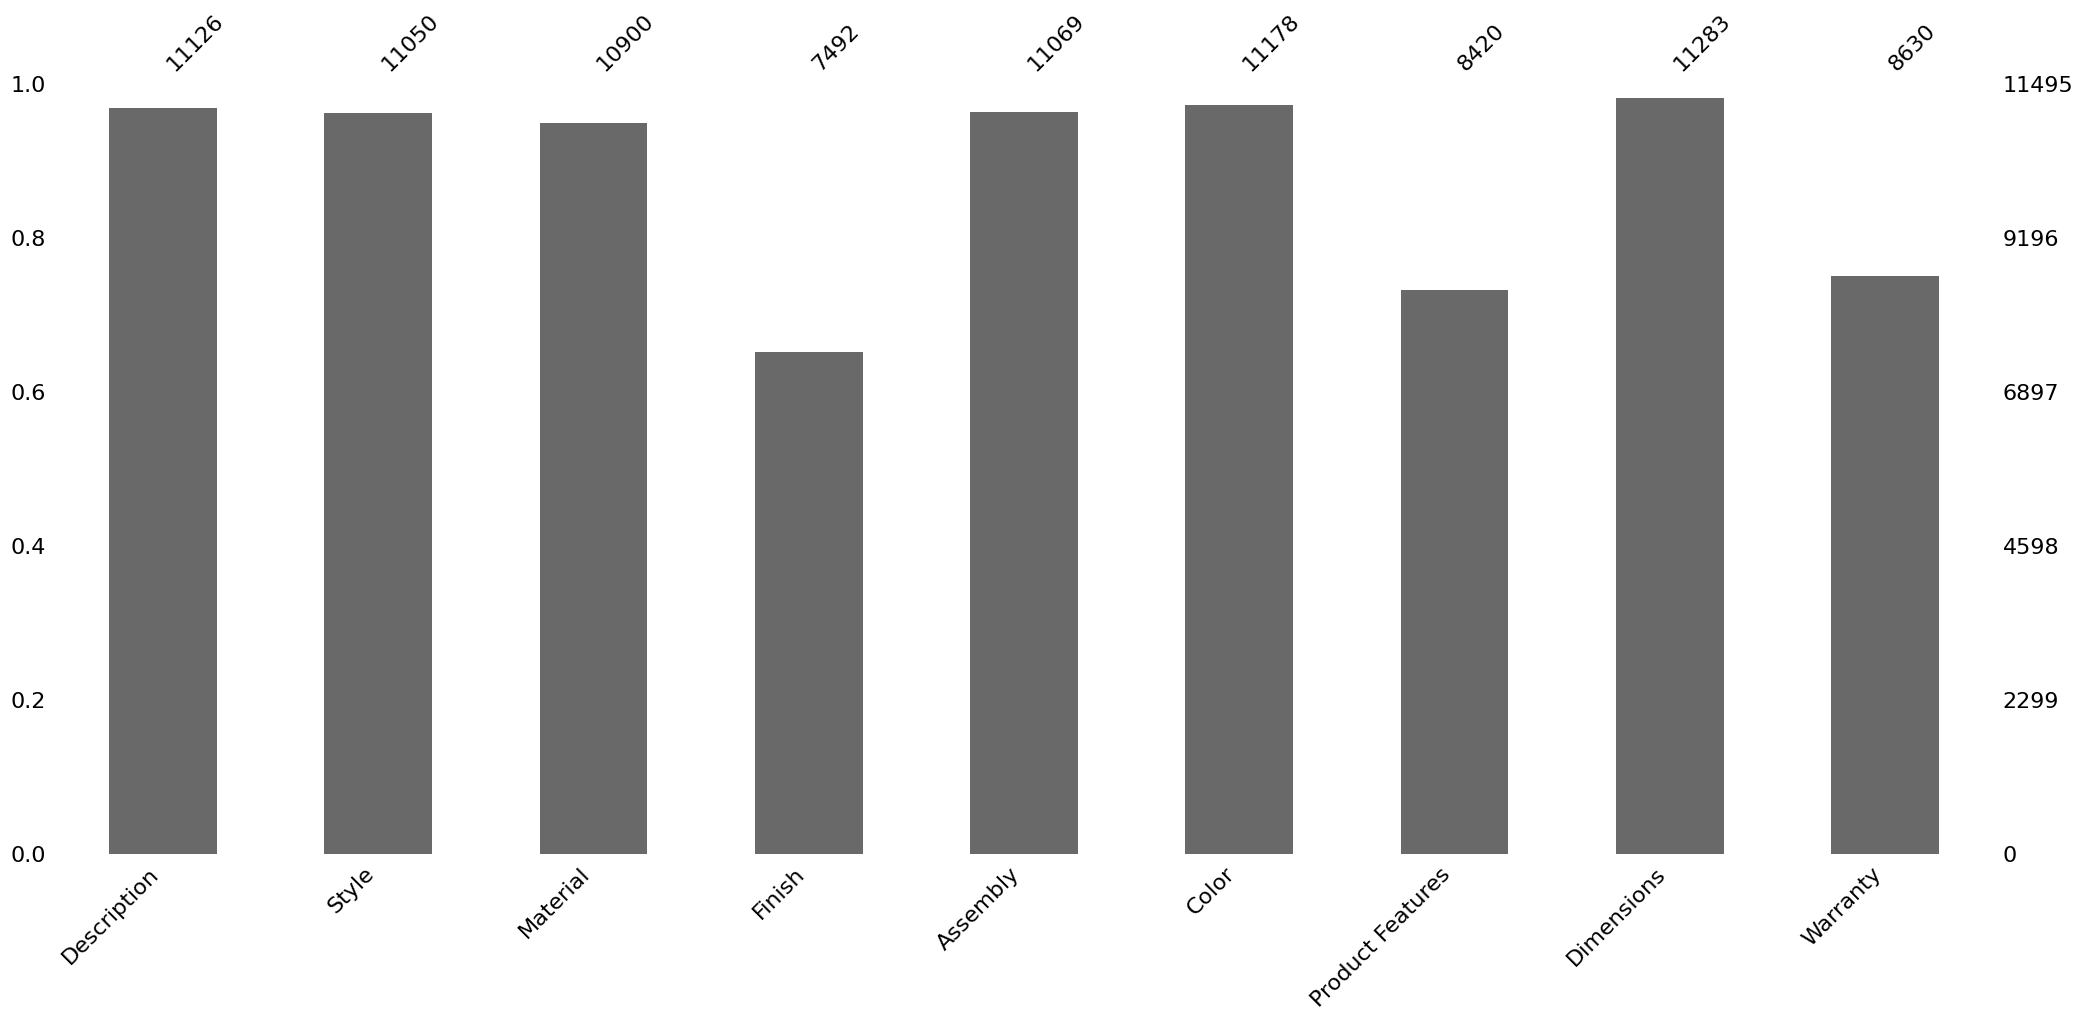

In [10]:
msno.bar(df_clean)

In [11]:
# remove rows completly null
df_clean = df_clean.dropna(subset=df_clean.columns, how='all')

In [12]:
df_clean = df_clean.dropna(subset=['Description'])
print(f"Nulls in description: {df_clean['Description'].isna().sum()}")
print(df_clean.shape)


Nulls in description: 0
(11126, 9)


In [13]:
df_clean.isna().sum()

Description            0
Style                366
Material             516
Finish              3847
Assembly             368
Color                249
Product Features    2953
Dimensions           164
Warranty            2752
dtype: int64

In [14]:
# remove all description that has a length < 50 characters
df_clean_desc = df_clean[df_clean['Description'].str.len() > 50]
df_clean_desc.shape

(10094, 9)

# Tmp saving data

In [15]:
tmp_df = df_clean_desc.dropna()
print(tmp_df.shape)
tmp_df.to_csv('data/data_cleaned.csv', index=False)

(3645, 9)


In [16]:
tmp_df.sample()

,Description,Style,Material,Finish,Assembly,Color,Product Features,Dimensions,Warranty
8111,The Long Console Table with Storage offers spa...,Industrial,Wood,Wood Finish,Assembly Required,"Brown, Grey",Storage,55. 1 In. L X 13. 4 In. W X 30. 0 In. H,1 year Manufacturer
